<a href="https://colab.research.google.com/github/blurred421/LFD473-code/blob/main/notebooks/Chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7: Pretrained Models in TIMM and HuggingFace

In [1]:
!pip install transformers timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
!wget https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/helper_functions.py

--2025-03-11 16:31:57--  https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3583 (3.5K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   3.50K  --.-KB/s    in 0s      

2025-03-11 16:31:57 (44.5 MB/s) - ‘helper_functions.py’ saved [3583/3583]



In [3]:
from helper_functions import get_image_from_url

## 7.2 Learning Objectives

By the end of this chapter, you should be able to:
- explore the TIMM (PyTorch Image Models) package and run inference on its models
- explore HuggingFace's models and pipelines, and run inference on them

## 7.3 PyTorch Image Models (TIMM)

(Py)Torch Image Models, or TIMM for short, is a popular [repository](https://github.com/huggingface/pytorch-image-models) for computer vision models in PyTorch and it has recently become part of the HuggingFace ecosystem. It is described as an open-source collection of state-of-the-art PyTorch image models, pretrained weights, and utility scripts for training, inference, and validation.

In [4]:
import timm
import torch
from torchvision.transforms import ToPILImage

timm_models = timm.list_models(pretrained=True)
len(timm_models)

1599

### 7.3.1 Model

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

In [5]:
model = timm.create_model('mobilevit_xxs', pretrained=True)
model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/5.14M [00:00<?, ?B/s]

ByobNet(
  (stem): ConvNormAct(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
  )
  (stages): Sequential(
    (0): Sequential(
      (0): BottleneckBlock(
        (shortcut): Identity()
        (conv1_1x1): ConvNormAct(
          (conv): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
        )
        (conv2_kxk): ConvNormAct(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
          

### 7.3.2 Metadata

In [6]:
model_cfg = model.pretrained_cfg
model_cfg

{'url': '',
 'hf_hub_id': 'timm/mobilevit_xxs.cvnets_in1k',
 'architecture': 'mobilevit_xxs',
 'tag': 'cvnets_in1k',
 'custom_load': False,
 'input_size': (3, 256, 256),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.9,
 'crop_mode': 'center',
 'mean': (0.0, 0.0, 0.0),
 'std': (1.0, 1.0, 1.0),
 'num_classes': 1000,
 'pool_size': (8, 8),
 'first_conv': 'stem.conv',
 'classifier': 'head.fc'}

### 7.3.3 Transforms

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step3.png)

In [7]:
transform_cfg = timm.data.resolve_data_config(model_cfg)
transform_cfg

{'input_size': (3, 256, 256),
 'interpolation': 'bicubic',
 'mean': (0.0, 0.0, 0.0),
 'std': (1.0, 1.0, 1.0),
 'crop_pct': 0.9,
 'crop_mode': 'center'}

In [8]:
transforms_fn = timm.data.create_transform(**transform_cfg)
transforms_fn

Compose(
    Resize(size=284, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(256, 256))
    MaybeToTensor()
    Normalize(mean=tensor([0., 0., 0.]), std=tensor([1., 1., 1.]))
)

This is the implementation of the `__call__` method of the `Compose` class:

```python
def __call__(self, img):
    for t in self.transforms:
        img = t(img)
    return img
```

Now, see how the `forward` method of the `Sequential` class is implemented:

```python
def forward(self, input):
    for module in self:
        input = module(input)
    return input
```

They are essentially the same thing.


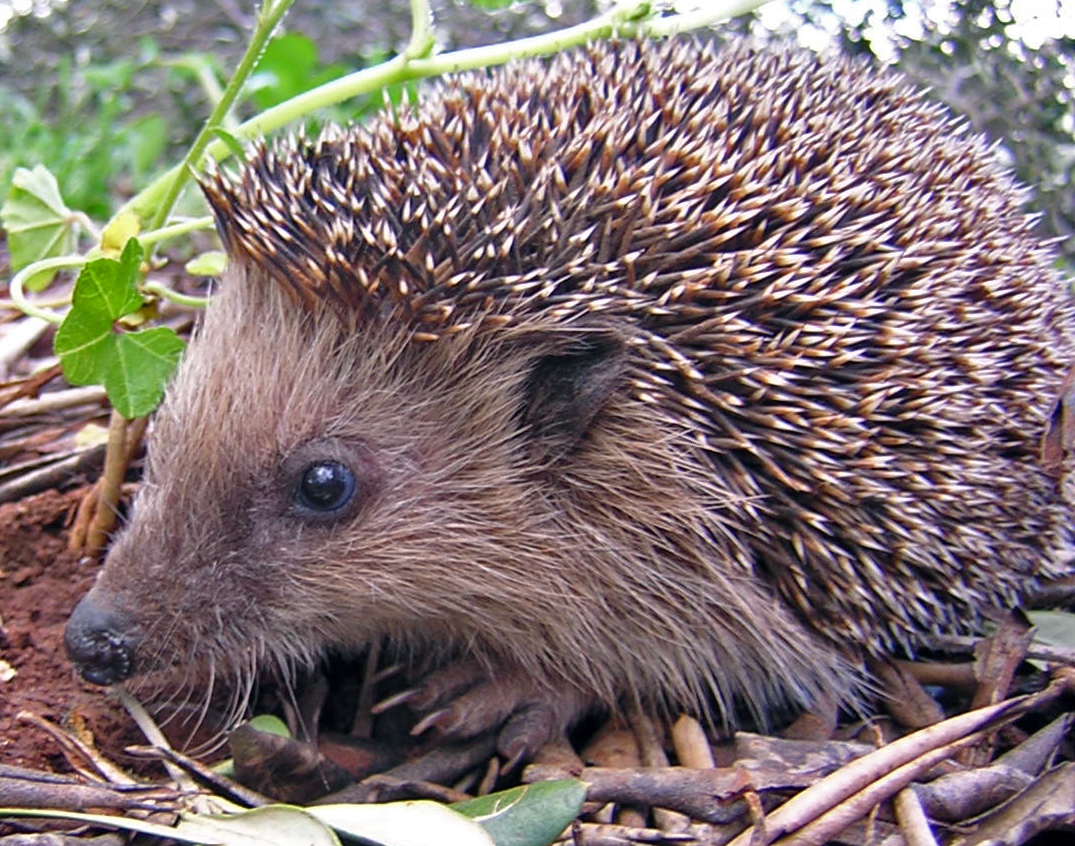

In [9]:
url = 'https://upload.wikimedia.org/wikipedia/commons/7/72/Igel.JPG'
headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}
img = get_image_from_url(url, headers)
img

In [10]:
preproc_img = transforms_fn(img)
preproc_img.shape

torch.Size([3, 256, 256])

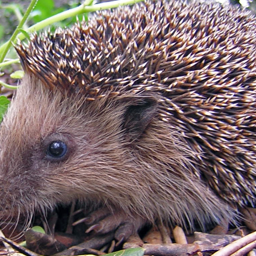

In [11]:
ToPILImage()(preproc_img)

### 7.3.4 Inference

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step5.png)

In [12]:
import requests
IMAGENET_1k_URL = 'https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt'
IMAGENET_1k_LABELS = requests.get(IMAGENET_1k_URL).text.strip().split('\n')

In [13]:
from PIL import Image

def predict(path_or_url, model, transforms_fn, categories, topk=1, headers=None):
    if path_or_url.startswith('http'):
        img = get_image_from_url(path_or_url, headers=headers)
    else:
        img = Image.open(path_or_url)

    preproc_img = transforms_fn(img)
    if len(preproc_img.shape) == 3:
        preproc_img = preproc_img.unsqueeze(0)

    model.eval()
    device = next(iter(model.parameters())).device
    pred = model(preproc_img)

    probabilities = torch.nn.functional.softmax(pred[0], dim=0)
    values, indices = torch.topk(probabilities, topk)

    return [{'label': categories[i], 'value': v.item()} for i, v in zip(indices, values)]

In [14]:
headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}
predict(url, model, transforms_fn, IMAGENET_1k_LABELS, topk=3, headers=headers)

[{'label': 'porcupine, hedgehog', 'value': 0.9360222220420837},
 {'label': 'echidna, spiny_anteater, anteater', 'value': 0.019951263442635536},
 {'label': 'limpkin, Aramus_pictus', 'value': 0.0019446512451395392}]

### 7.3.5 Feature Extraction

In [15]:
features = model.forward_features(preproc_img.unsqueeze(0))
features.shape

torch.Size([1, 320, 8, 8])

## 7.4 HuggingFace

### 7.4.1 Hub

The HuggingFace Hub is a platform with thousands of publicly available and open source models, datasets, and demo apps (Spaces). The Model Hub hosts pretrained models that can be downloaded using the [`huggingface_hub` library](https://huggingface.co/docs/huggingface_hub/index) or any of its [integrated libraries](https://huggingface.co/docs/hub/models-libraries) such as the Transformers library, which we'll be using here.

### 7.4.2 Transformers

Transformers is the most popular and well-known library from HuggingFace. It provides access thousands of pretrained models from the [Model Hub](https://huggingface.co/models) to perform tasks on different modalities such as text, vision, and audio. In computer vision, it offers models for tasks such as image classification, object detection, semantic segmentation, video classification, and more.

### 7.4.3 Model

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

In [16]:
from transformers import AutoModelForImageClassification

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch5/hf_model_tasks.png)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch5/hf_model_image_cls.png)

In [17]:
model_name = 'google/vit-base-patch16-224'
model = AutoModelForImageClassification.from_pretrained(model_name)

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

### 7.4.4 Metadata

In [18]:
dir(model.config)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attn_implementation',
 '_attn_implementation_autoset',
 '_attn_implementation_internal',
 '_auto_class',
 '_commit_hash',
 '_create_repo',
 '_dict_from_json_file',
 '_get_config_dict',
 '_get_files_timestamps',
 '_get_global_generation_defaults',
 '_get_non_default_generation_parameters',
 '_name_or_path',
 '_set_token_in_kwargs',
 '_upload_modified_files',
 'add_cross_attention',
 'architectures',
 'attention_probs_dropout_prob',
 'attribute_map',
 'bad_words_ids',
 'base_config_key',
 'base_model_tp_plan',
 'begin_suppress_tokens',
 'bos_token_id',
 '

In [19]:
labels = model.config.id2label
categories = list(labels.values())

### 7.4.5 Transforms

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step3.png)

In [20]:
from transformers import AutoImageProcessor
processor = AutoImageProcessor.from_pretrained(model_name)
processor

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


ViTImageProcessor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [21]:
url = 'https://upload.wikimedia.org/wikipedia/commons/7/72/Igel.JPG'
headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}
img = get_image_from_url(url, headers)

In [22]:
processor(img)

{'pixel_values': [array([[[ 0.6784314 ,  0.67058825,  0.79607844, ...,  0.84313726,
          0.9843137 ,  0.99215686],
        [ 0.9137255 ,  0.8666667 ,  0.85882354, ...,  0.77254903,
          0.99215686,  0.99215686],
        [ 0.99215686,  0.9843137 ,  0.8745098 , ...,  0.9372549 ,
          0.9843137 ,  0.99215686],
        ...,
        [-0.29411763,  0.082353  ,  0.36470592, ..., -0.99215686,
         -1.        , -1.        ],
        [ 0.4431373 ,  0.33333337,  0.22352946, ..., -1.        ,
         -1.        , -0.99215686],
        [ 0.35686278,  0.20000005,  0.19215691, ..., -1.        ,
         -0.99215686, -0.99215686]],

       [[ 0.70980394,  0.6862745 ,  0.8039216 , ...,  0.8509804 ,
          0.99215686,  0.99215686],
        [ 0.9137255 ,  0.8745098 ,  0.8666667 , ...,  0.78039217,
          0.99215686,  0.99215686],
        [ 0.99215686,  0.9843137 ,  0.8745098 , ...,  0.9372549 ,
          0.9843137 ,  0.99215686],
        ...,
        [-0.4823529 , -0.08235294,  

In [23]:
def build_transforms_fn(processor):
    def transforms_fn(img):
        return processor.preprocess(img, return_tensors='pt')['pixel_values']
    return transforms_fn

transforms_fn = build_transforms_fn(processor)

In [24]:
preproc_img = transforms_fn(img)
preproc_img.shape

torch.Size([1, 3, 224, 224])

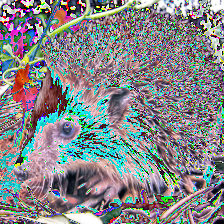

In [25]:
ToPILImage()(preproc_img[0])

### 7.4.6 Inference

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step5.png)

In [ ]:
model.eval()
pred = model(preproc_img)
isinstance(pred, dict), pred

(True,
 ImageClassifierOutput(loss=None, logits=tensor([[-5.2828e-01, -1.9690e-01,  1.7011e-01, -1.1577e+00,  1.2764e-01,
           1.5199e+00, -8.2261e-02, -7.6578e-01, -5.8229e-01,  1.6382e-01,
          -5.8190e-02, -6.5383e-01, -5.7106e-01, -1.0750e+00, -5.2697e-02,
          -3.2867e-01, -5.4519e-01,  1.7482e-01,  7.8771e-01, -7.9023e-01,
           3.8849e-01,  7.3125e-01,  9.5177e-02, -8.5252e-02, -2.1558e-01,
           2.7923e-01,  1.7429e-01, -7.7838e-02, -5.9353e-02,  6.4259e-01,
          -7.3161e-01,  5.2128e-01,  1.2292e+00, -5.5364e-01,  6.6180e-01,
           8.0318e-01,  4.9903e-01,  1.3128e+00,  1.4090e+00, -5.6347e-01,
          -3.4607e-01,  1.3534e-01,  6.8190e-01,  1.3080e-01,  1.3090e-01,
           1.2250e+00,  4.7738e-01,  9.0579e-01, -1.9106e-01, -2.2675e-01,
           5.3929e-01,  3.6598e-01,  3.8111e-01,  6.6180e-01,  5.0082e-01,
           2.8769e-01,  1.4384e+00, -4.9748e-01, -1.7561e-01, -2.2807e-01,
           1.5468e+00,  8.4968e-01, -2.8348e-01, -3.9

In [ ]:
def predict(path_or_url, model, transforms_fn, categories, topk=1, headers=None):
    if path_or_url.startswith('http'):
        img = get_image_from_url(path_or_url, headers=headers)
    else:
        img = Image.open(path_or_url)

    preproc_img = transforms_fn(img)
    if len(preproc_img.shape) == 3:
        preproc_img = preproc_img.unsqueeze(0)

    model.eval()
    device = next(iter(model.parameters())).device
    pred = model(preproc_img)

    # If the output is a dictionary, extract logits from it
    if isinstance(pred, dict):
        pred = pred['logits']

    probabilities = torch.nn.functional.softmax(pred[0], dim=0)
    values, indices = torch.topk(probabilities, topk)

    return [{'label': categories[i], 'value': v.item()} for i, v in zip(indices, values)]

In [ ]:
predict(url, model, transforms_fn, categories, topk=5)

[{'label': 'porcupine, hedgehog', 'value': 0.9820719361305237},
 {'label': 'echidna, spiny anteater, anteater', 'value': 0.001100568100810051},
 {'label': 'microphone, mike', 'value': 0.0005925498553551733},
 {'label': 'beaver', 'value': 0.0005919974064454436},
 {'label': 'badger', 'value': 0.0003148827818222344}]

### 7.4.7 Pipelines

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch5/hf_cv_tasks.png)

In [ ]:
from transformers import pipeline
classifier = pipeline(task='image-classification')

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step5.png)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch5/hedgehog.jpg)

Source: [Hedgehog](https://pixabay.com/photos/hedgehog-child-young-hedgehog-1759006/) by [Alexas_Fotos](https://pixabay.com/users/alexas_fotos-686414/)

In [ ]:
!wget https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch5/hedgehog.jpg

In [ ]:
fname = './hedgehog.jpg'
classifier(fname)

[{'score': 0.9752089381217957, 'label': 'porcupine, hedgehog'},
 {'score': 0.0014133171644061804, 'label': 'beaver'},
 {'score': 0.0010406860383227468,
  'label': 'echidna, spiny anteater, anteater'},
 {'score': 0.0006260039517655969, 'label': 'weasel'},
 {'score': 0.00047749432269483805, 'label': 'badger'}]

In [ ]:
from transformers.pipelines import SUPPORTED_TASKS
SUPPORTED_TASKS['image-classification']['default']

{'model': {'pt': ('google/vit-base-patch16-224', '5dca96d'),
  'tf': ('google/vit-base-patch16-224', '5dca96d')}}

In [ ]:
classifier.model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

#### 7.4.7.1 Model

In [ ]:
classifier = pipeline('image-classification', model='google/vit-base-patch16-224')

#### 7.4.7.2 Transforms

In [ ]:
processor = classifier.image_processor
processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

#### 7.4.7.3 Inference

In [ ]:
fname = './hedgehog.jpg'
classifier(fname)

[{'score': 0.9752089381217957, 'label': 'porcupine, hedgehog'},
 {'score': 0.0014133171644061804, 'label': 'beaver'},
 {'score': 0.0010406860383227468,
  'label': 'echidna, spiny anteater, anteater'},
 {'score': 0.0006260039517655969, 'label': 'weasel'},
 {'score': 0.00047749432269483805, 'label': 'badger'}]